In [16]:
from matplotlib import pyplot as plt
from upsetplot import generate_data, plot
import pandas as pd
import numpy as  np

In [17]:
df = pd.read_csv('processedDF.csv', header='infer')
df.head()


/var/folders/yf/64msspd51930bljsmskng8v00000gn/T/ipykernel_46050/3969430900.py:1: DtypeWarning:

Columns (455) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,TUCASEID,MetStat,EduStat,Hisp,Race,Age,LaborStat,IsStudying,SchoolLevel,...,IsStudyGrp,SchoolLevelGrp,SpousePresentGrp,SpouseEmplGr,SelfEmplTimeGrp,SpouseEmplTimeGrp,ChildNumGrp,YChildAgeGrp,EarningsGrp,SpouseEmplGrp
0,0,20030100013280,NaN,44,2,2.0,60,2.0,NaN,NaN,...,NaN,NaN,Y,N,PT,NaN,None,NaN,Low Middle Class,N
1,1,20030100013344,NaN,40,2,1.0,41,1.0,2.0,NaN,...,N,NaN,Y,Y,PT,FT,1-2 children,Baby,Low Income,Y
2,2,20030100013352,NaN,41,2,1.0,26,2.0,2.0,NaN,...,N,NaN,Y,N,PT,NaN,None,NaN,Low Income,N
3,3,20030100013848,NaN,39,2,2.0,36,4.0,2.0,NaN,...,N,NaN,Y,Y,NaN,FT,1-2 children,NaN,NaN,Y
4,4,20030100014165,NaN,45,2,1.0,51,1.0,NaN,NaN,...,NaN,NaN,Y,N,FT,NaN,1-2 children,Teen,NaN,N


In [18]:
filtered_df = df[['LaborStat', 'HasSpouse', 'IsSpouseEmpl']]
print(filtered_df.shape)
filtered_df.head(3)

(228455, 3)


,LaborStat,HasSpouse,IsSpouseEmpl
0,2.0,1,2.0
1,1.0,1,1.0
2,2.0,1,2.0


In [19]:
filtered_df['LFilter'] = filtered_df['LaborStat'] < 3
filtered_df['SFilter'] = filtered_df['HasSpouse'] < 3
filtered_df['EFilter'] = filtered_df['IsSpouseEmpl'] < 2
filtered_df.head(3)

/var/folders/yf/64msspd51930bljsmskng8v00000gn/T/ipykernel_46050/745334792.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yf/64msspd51930bljsmskng8v00000gn/T/ipykernel_46050/745334792.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yf/64msspd51930bljsmskng8v00000gn/T/ipykernel_46050/745334792.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,LaborStat,HasSpouse,IsSpouseEmpl,LFilter,SFilter,EFilter
0,2.0,1,2.0,True,True,False
1,1.0,1,1.0,True,True,True
2,2.0,1,2.0,True,True,False


In [20]:
selected_df = filtered_df[['LFilter', 'SFilter', 'EFilter']]
selected_df.head(3)

,LFilter,SFilter,EFilter
0,True,True,False
1,True,True,True
2,True,True,False


In [21]:
from upsetplot import from_indicators
from upsetplot import UpSet
employment_data = from_indicators(selected_df, data=df)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

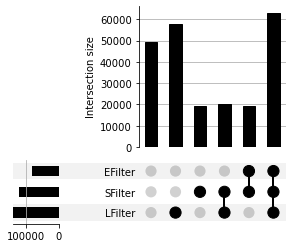

In [22]:
UpSet(employment_data).plot()

In [23]:
##Radar plot - i dont think it can be used
import plotly.graph_objects as go
import plotly.offline as pyo

categories = ['LFilter', 'SFilter', 'EFilter']
categories = [*categories, categories[0]]


restaurant_1 = selected_df.sum().tolist()
restaurant_1 = [*restaurant_1, restaurant_1[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Counts')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Multi dimensional count comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'